# Multi Linear Regression Assignment Q2

### Q1) Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

#R&D Spend -- Research and devolop spend in the past few years
#Administration -- spend on administration in the past few years
#Marketing Spend -- spend on Marketing in the past few years
#State -- states from which data is collected
#Profit  -- profit of each state in the past few years

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
#Import the data 
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [3]:
data.info() #No nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#Update the column names to be meaningful and easy to use
data1 = data.rename({'R&D Spend':'RD_S', 'Administration':'Admin_S','Marketing Spend':'MKT_S'}, axis = 1)
data1.head()

,RD_S,Admin_S,MKT_S,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#Check if there are any duplicate rows
data1[data1.duplicated() == True] # There are no duplicates

,RD_S,Admin_S,MKT_S,State,Profit


In [6]:
#Converting categorical variables to numeric
data2 = pd.get_dummies(data=data1,columns=['State'])
data2.head()

,RD_S,Admin_S,MKT_S,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [7]:
#Remaning the one-hot encoded column values
data3 = data2.rename({'State_California':'State_C', 'State_Florida':'State_F','State_New York':'State_N'}, axis = 1)
data3.head()

,RD_S,Admin_S,MKT_S,Profit,State_C,State_F,State_N
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [8]:
# Rearrange columns
col_order = ['RD_S','Admin_S','MKT_S','State_C','State_F','State_N','Profit']
data4 = data3.reindex(columns=col_order)
data4.head()

,RD_S,Admin_S,MKT_S,State_C,State_F,State_N,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


In [9]:
data4.shape

(50, 7)

In [10]:
data4.info()                                       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
RD_S       50 non-null float64
Admin_S    50 non-null float64
MKT_S      50 non-null float64
State_C    50 non-null uint8
State_F    50 non-null uint8
State_N    50 non-null uint8
Profit     50 non-null float64
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [11]:
data4. describe()

,RD_S,Admin_S,MKT_S,State_C,State_F,State_N,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,0.340000,0.320000,0.340000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.478518,0.471212,0.478518,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,0.000000,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,0.000000,0.000000,0.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,1.000000,1.000000,1.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,1.000000,1.000000,1.000000,192261.830000


## Correlation Analysis

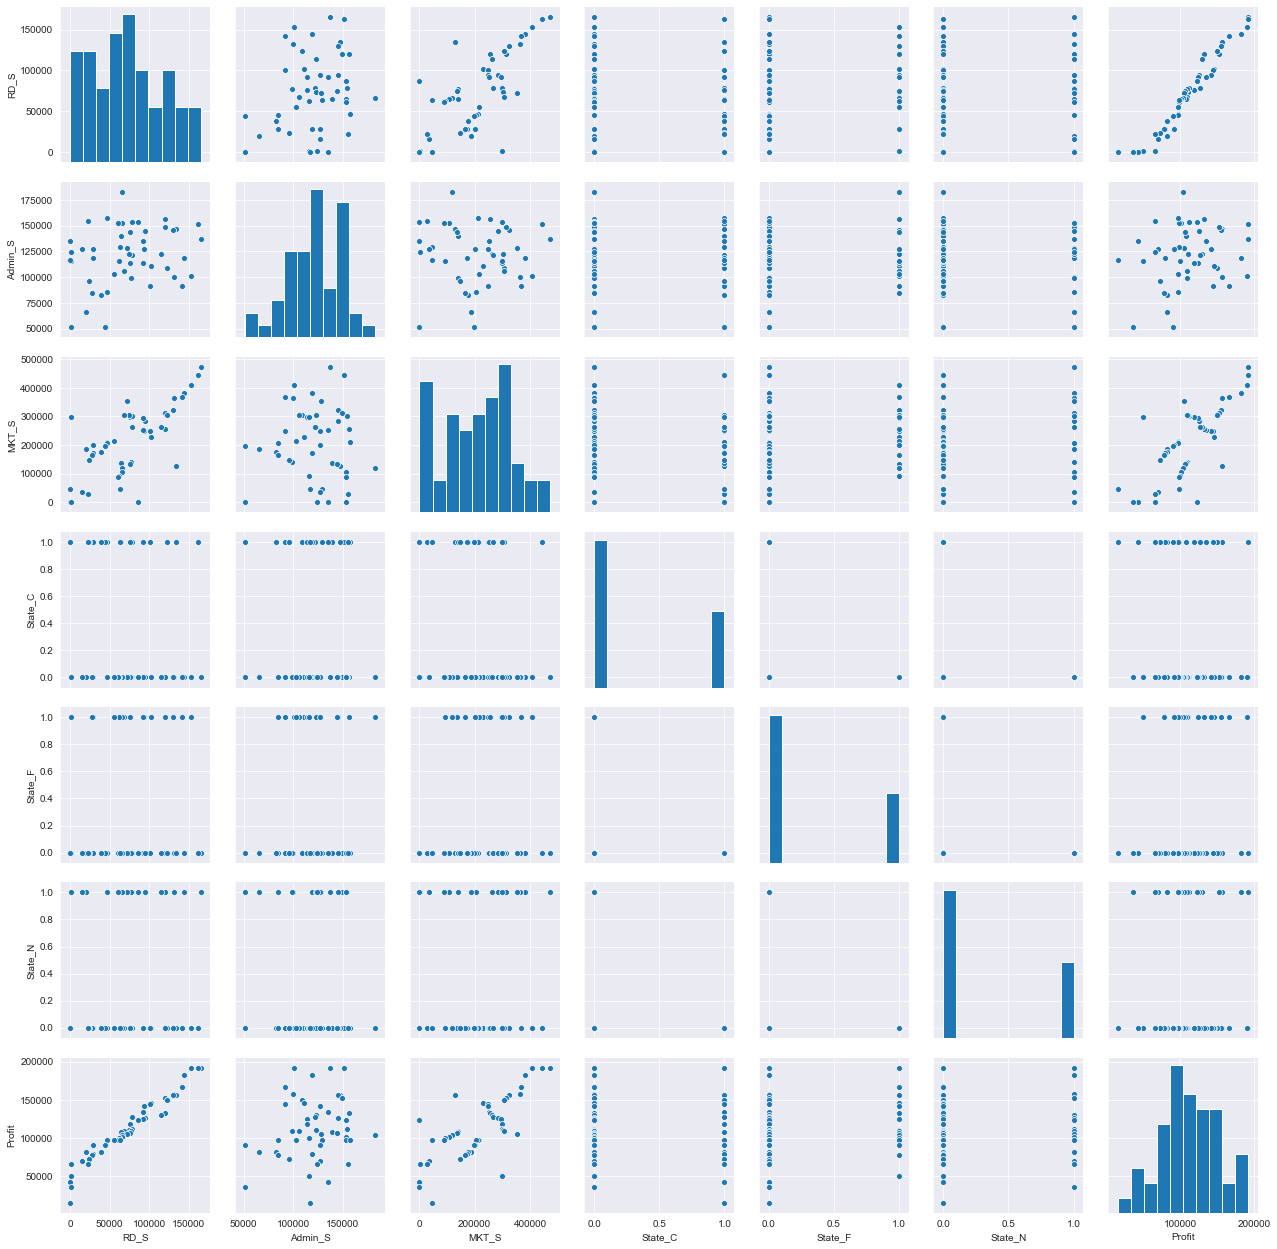

In [12]:
# Plot the pair plots to see if there is any linearity between the varaibles
sns.set_style(style='darkgrid')
sns.pairplot(data4)

In [13]:
# Calculating the strength of correlation
data4.iloc[:,0:6].corr() # No high correlation between the predictors

,RD_S,Admin_S,MKT_S,State_C,State_F,State_N
RD_S,1.000000,0.241955,0.724248,-0.143165,0.105711,0.039068
Admin_S,0.241955,1.000000,-0.032154,-0.015478,0.010493,0.005145
MKT_S,0.724248,-0.032154,1.000000,-0.168875,0.205685,-0.033670
State_C,-0.143165,-0.015478,-0.168875,1.000000,-0.492366,-0.515152
State_F,0.105711,0.010493,0.205685,-0.492366,1.000000,-0.492366
State_N,0.039068,0.005145,-0.033670,-0.515152,-0.492366,1.000000


In [14]:
data4.iloc[:,0:6].corr() > 0.5 #RD_S and MKT_s are having high correlation

,RD_S,Admin_S,MKT_S,State_C,State_F,State_N
RD_S,True,False,True,False,False,False
Admin_S,False,True,False,False,False,False
MKT_S,True,False,True,False,False,False
State_C,False,False,False,True,False,False
State_F,False,False,False,False,True,False
State_N,False,False,False,False,False,True


## Building the model

In [15]:
#Build the model
model= smf.ols('Profit~RD_S+Admin_S+MKT_S+State_C+State_F+State_N', data=data4)
model_fit = model.fit()

## Model Evaluation:

In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           1.34e-27
Time:                        23:36:23   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD_S           0.8060      0.046     17.369      0.000       0.712       0.900
Admin_S       -0.0270      0.052     -0.517      0.608      -0.132       0.078
MKT_S          0.0270      0.017      1.574      0.123      -0.008       0.062
State_C     1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_F     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_N     1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     4.61e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
#Model coefficient parameters
model_fit.params

Intercept    37633.233317
RD_S             0.806023
Admin_S         -0.027004
MKT_S            0.026980
State_C      12492.110514
State_F      12690.899307
State_N      12450.223495
dtype: float64

In [18]:
#Model p-values
np.round(model_fit.pvalues,5)

Intercept    0.00000
RD_S         0.00000
Admin_S      0.60774
MKT_S        0.12268
State_C      0.00001
State_F      0.00003
State_N      0.00001
dtype: float64

In [19]:
#Model accuracy
model_fit.rsquared, model_fit.rsquared_adj

(0.9507524843355148, 0.945156175737278)

In [20]:
#Check why the p-values of Admin_S and MKT_S are high.
#individual plots of simple linear regression
model2 = smf.ols('Profit~Admin_S', data = data4)
model2_fit = model2.fit()
np.round(model2_fit.pvalues,6) #P-Value is significantly high

Intercept    0.003824
Admin_S      0.162217
dtype: float64

In [21]:
model3 = smf.ols('Profit~MKT_S',data = data4)
model3_fit = model3.fit()
np.round(model3_fit.pvalues,6) # P-Value is very low

Intercept    0.0
MKT_S        0.0
dtype: float64

In [22]:
model4 = smf.ols('Profit~Admin_S+MKT_S',data = data4)
model4_fit = model4.fit()
np.round(model4_fit.pvalues,6)
#P-value for Admin_S is considerably high

Intercept    0.258934
Admin_S      0.017292
MKT_S        0.000000
dtype: float64

## Model validation:
### 1. Check Colinearity: VIF method

In [23]:
#Build models to check the multi colinearlity between the preictors. 
rsq_RD_S= smf.ols('RD_S~Admin_S+MKT_S+State_C+State_F+State_N', data=data4).fit()
vif_RD_S = 1/(1-rsq_RD_S.rsquared)
rsq_Admin_S= smf.ols('Admin_S~RD_S+MKT_S+State_C+State_F+State_N', data=data4).fit()
vif_Admin_S = 1/(1-rsq_Admin_S.rsquared)
rsq_MKT_S= smf.ols('MKT_S~Admin_S+RD_S+State_C+State_F+State_N', data=data4).fit()
vif_MKT_S= 1/(1-rsq_MKT_S.rsquared)

vif_all= pd.DataFrame({'Variables':['RD_S','Admin_S','MKT_S'],
    'VIF':[vif_RD_S,vif_Admin_S,vif_MKT_S]})
vif_all

,Variables,VIF
0,RD_S,2.495511
1,Admin_S,1.177766
2,MKT_S,2.416797


In [24]:
#None of the VIF >20, consider all are relevent features

### 2. Residual Analysis

In [25]:
import statsmodels.api as sm

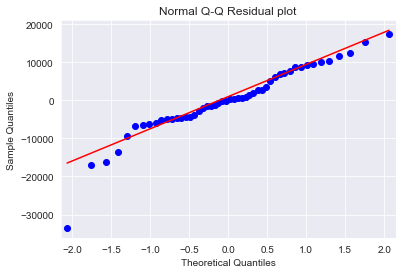

In [26]:
#Residual analysis(Normality check)
#Use Q-Q plot
sm.qqplot(model_fit.resid,line='q') #q- Theoritical line
plt.title('Normal Q-Q Residual plot')
plt.show()
#Most of the points are on the line, hence the residuals are normally distributed.

In [27]:
# outliers from above graph  
np.where(model_fit.resid < -20000) # Residula points <-20000

(array([49], dtype=int64),)

### Homoscedasticity or Hetroscedasticity- Model validation

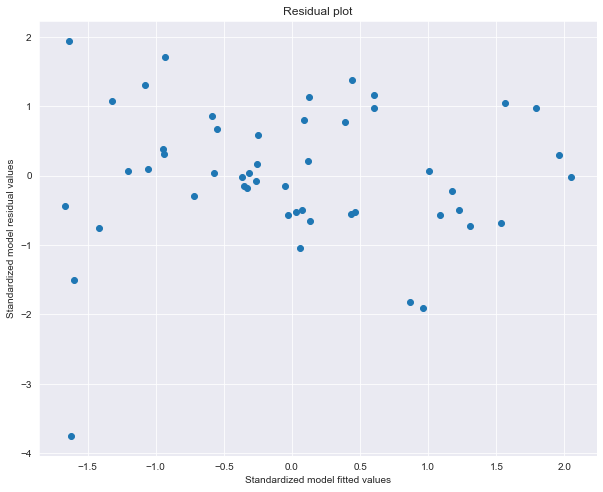

In [28]:
#Residual plots for Homoscedasticity or Hetroscedasticity
#Scatter plot between model_fit.fittedvalues and model_fit.resid
#Standardize the values
# def a function to standardize
def get_stan_vals(vals):
    return((vals-vals.mean())/vals.std())
#plot a scatter plot
fig = plt.figure(figsize=(10,8))
plt.scatter(get_stan_vals(model_fit.fittedvalues),get_stan_vals(model_fit.resid),figure=fig)
plt.title('Residual plot')
plt.xlabel('Standardized model fitted values')
plt.ylabel('Standardized model residual values')
plt.show()

In [29]:
# mu is nearly around 0, No patterns found. The modelis performing reasonably better

 ## Residuals vs Regressors plots

In [30]:
# Residuals vs Regressors  # each column with y
# using Residual-Regression Plots, code: graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

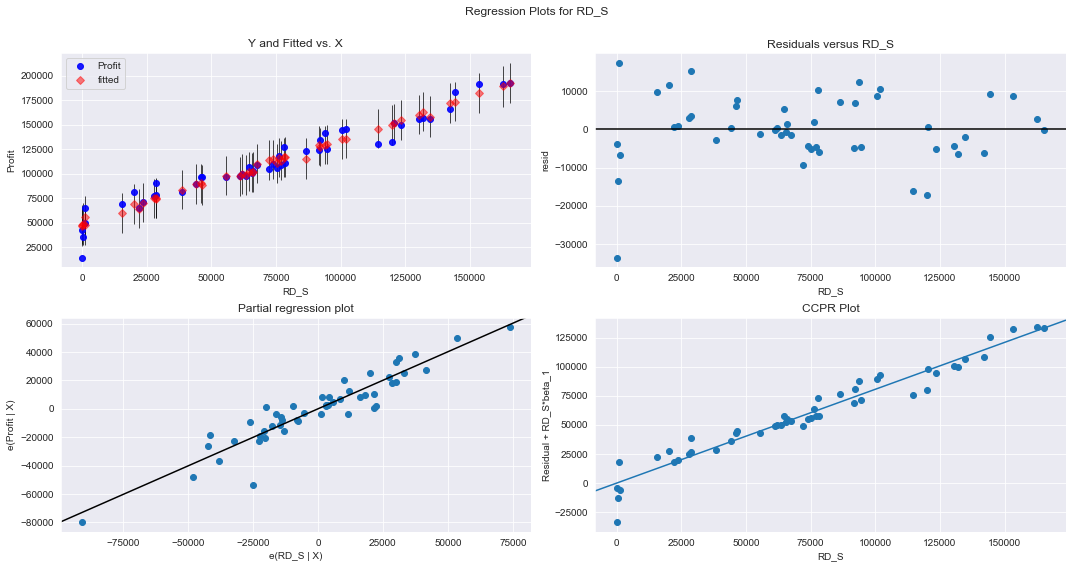

In [31]:
fig = plt.figure(figsize=(15,8))
#plot for RD_S
sm.graphics.plot_regress_exog(model_fit,'RD_S',fig = fig)
plt.show() # AS per plot, The Profits are directly proportional to the RD_S

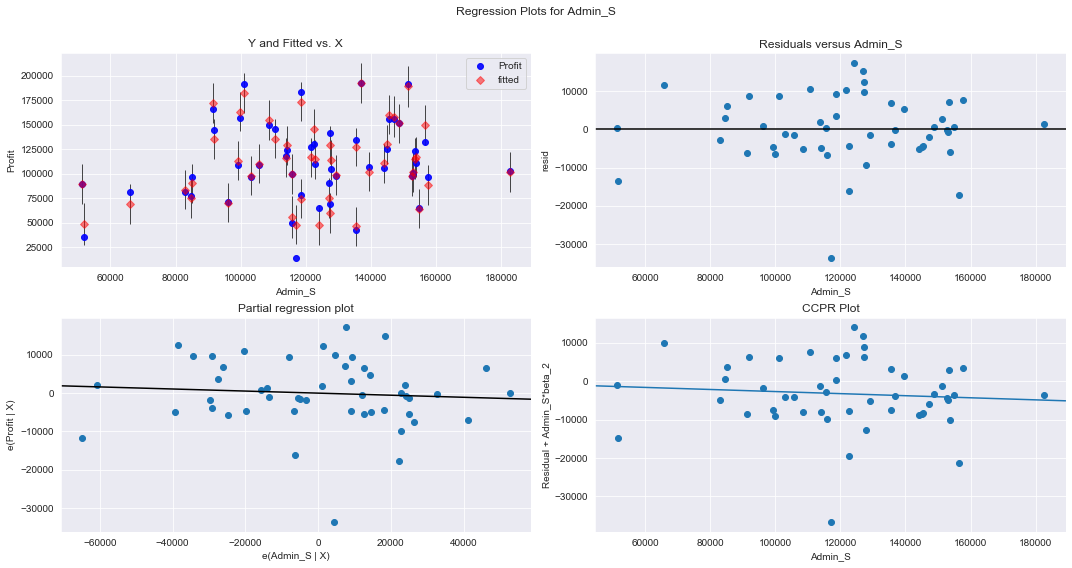

In [32]:
fig = plt.figure(figsize=(15,8))
#plot for KM
sm.graphics.plot_regress_exog(model_fit,'Admin_S',fig = fig)
plt.show() # AS per plot, The Profits are very slightly changing when Admin_S changes

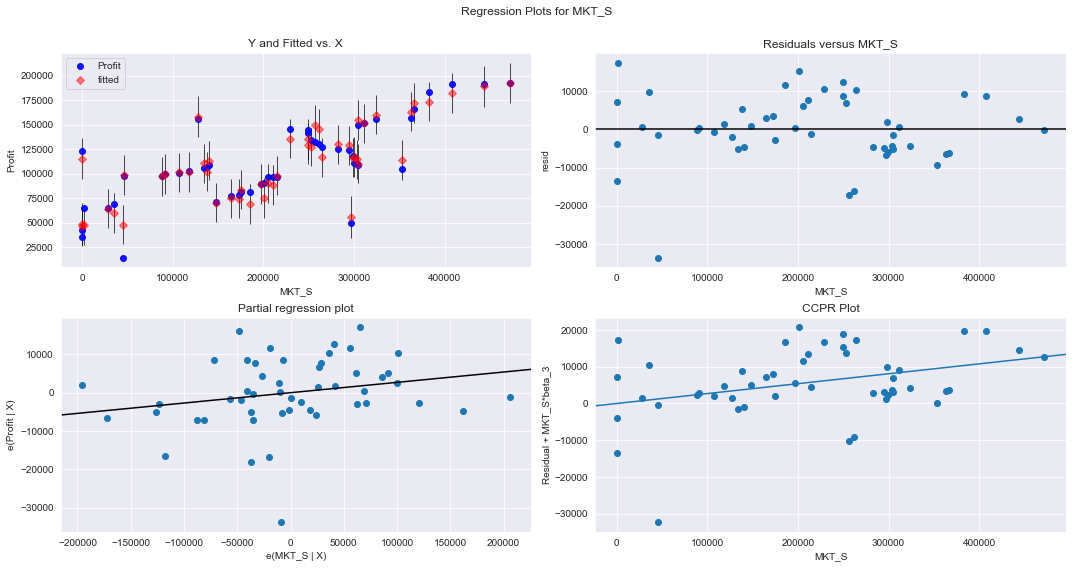

In [33]:
fig = plt.figure(figsize=(15,8))
#plot for HP
sm.graphics.plot_regress_exog(model_fit,'MKT_S',fig = fig)
plt.show() # AS per plot, The Profits are mostly directly proportional to the MKT_S

## Model Deletion Diagnostics (checking Outliers or Influencers)
### 1. Cook's Distance

In [34]:
# Cook's Distance- Get influencers using cooks distence
(c,_)=model_fit.get_influence().cooks_distance
c

array([6.58235386e-06, 3.39430615e-03, 2.39098625e-02, 2.02032949e-02,
       1.20198420e-02, 1.00370545e-02, 2.13697865e-03, 3.57036535e-03,
       6.25257579e-05, 5.41213370e-03, 1.89764313e-02, 1.65867572e-02,
       1.82797330e-02, 6.34364572e-03, 6.17285106e-02, 3.72134923e-02,
       1.35078103e-02, 3.71193311e-03, 2.94854637e-03, 2.81922632e-02,
       6.02783698e-04, 1.00287995e-02, 3.02178458e-03, 3.16115938e-04,
       4.34597714e-03, 3.56884817e-03, 4.96640589e-03, 2.78597505e-02,
       9.20897921e-04, 9.83021753e-05, 2.28936702e-05, 3.65145588e-06,
       5.61582965e-04, 2.31043413e-04, 1.79909587e-02, 7.13289876e-03,
       5.07832731e-02, 6.16526092e-05, 4.78300794e-02, 1.37854568e-03,
       1.94676476e-03, 1.88154422e-03, 1.42427115e-04, 2.00561912e-02,
       1.00026060e-04, 8.09098154e-02, 3.62771434e-02, 3.84131479e-03,
       1.34036686e-01, 2.26250945e-01])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(*args, **kw)>

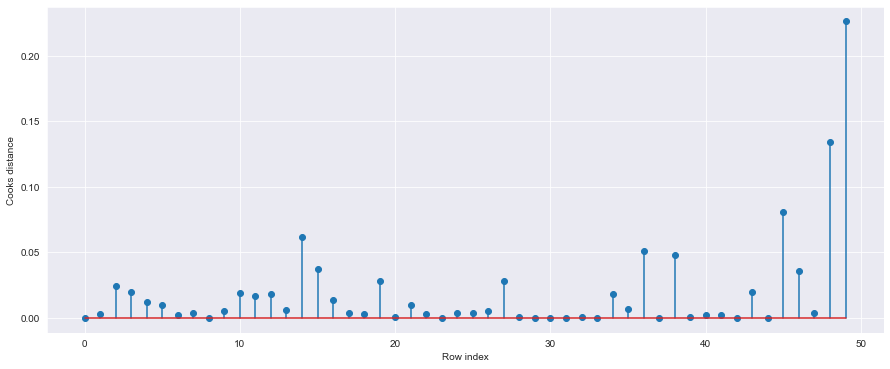

In [35]:
#Use stemplot
fig = plt.figure(figsize= (15,6))
plt.stem(np.arange(len(data3)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.title = 'Stem plot to identify influencers'
plt.show

In [36]:
# Index and value of influencer (where C>0.5)
np.argmax(c) , np.max(c)

(49, 0.2262509450150934)

### 2. Leverage value

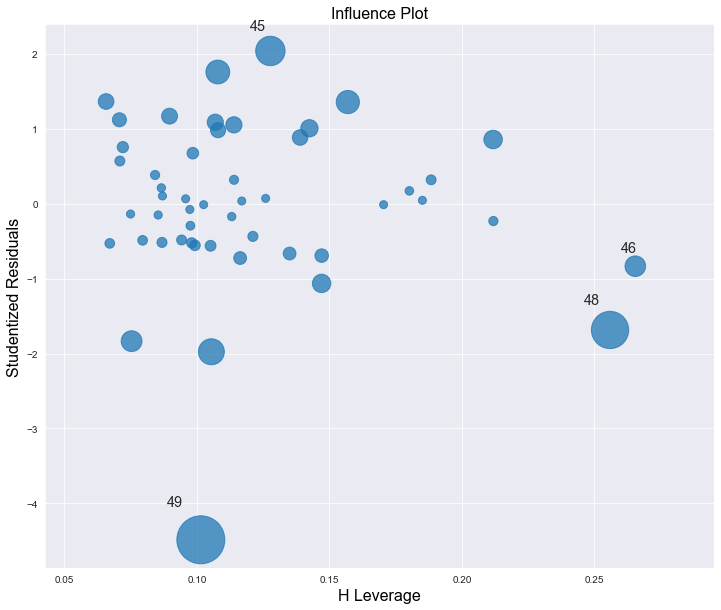

In [37]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
#Use influence plot
#influence_plot(model_fit)
#plt.show
fig,ax=plt.subplots(figsize=(12,10))
fig=influence_plot(model_fit,ax = ax)

In [38]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
n = data4.shape[0]
k = data4.shape[1]
l_cutoff = 3*(k+1)/n
l_cutoff

0.48

In [39]:
#From the above plot, it is evident that points beyond leverage cutoff value=0.48 are the outliers

In [40]:
data4.loc[49]

RD_S            0.00
Admin_S    116983.80
MKT_S       45173.06
State_C         1.00
State_F         0.00
State_N         0.00
Profit      14681.40
Name: 49, dtype: float64

## Improving the model

In [41]:
# Creating a copy of data so that original dataset is not affected
data4_new = data4.copy()
data4_new.head()
data4.shape

(50, 7)

In [42]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data5 = data4_new.drop(data4_new.index[[49]],axis=0).reset_index(drop=True)
data5.shape

(49, 7)

## Model Deletion Diagnostics and Final model

#### If you want to continue improving model by removing the influencers upto the max cooks distance of 0.5 then using the following, we can acheive some accuracy

In [43]:
#Remove the fluencers >0.5 and get the accuracy
while np.max(c) > .5:
    data5 = data5.drop(data5.index[[np.argmax(c)]],axis=0).reset_index(drop=True) 
    model_fit = smf.ols('Profit~RD_S+Admin_S+MKT_S+State_C+State_F+State_N', data=data5).fit()
    (c,_)=model_fit.get_influence().cooks_distance
    np.argmax(c) , np.max(c)
    print('Improved model accuracy after removing the max cook distance ponit', np.max(c), 'is', model_fit.rsquared)
else:
    final_model=smf.ols('Profit~RD_S+Admin_S+MKT_S+State_C+State_F+State_N', data=data5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model final  accuracy is improved to",final_model.rsquared)
    print("Thus model final  AIC is",final_model.aic)

Thus model final  accuracy is improved to 0.9618082858227786
Thus model final  AIC is 1023.9380387909305


In [44]:
#Accuracy of final model
final_model.rsquared # Model Accuracy is increased to 96.20%

0.9618082858227786

In [45]:
#Final optimized data
data5.head()

,RD_S,Admin_S,MKT_S,State_C,State_F,State_N,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


## Model Predictions

In [46]:
# Model predictions
pred = pd.DataFrame({'RD_S':150000,'Admin_S':130000,'MKT_S':50000,'State_C':1,'State_F':0, 'State_N': 0},index=[0])
pred

,RD_S,Admin_S,MKT_S,State_C,State_F,State_N
0,150000,130000,50000,1,0,0


In [47]:
final_model.predict(pred)

0    169345.786556
dtype: float64

In [48]:
# Automatic Prediction of Price with 96% accurcy
pred_y=final_model.predict(data5)
pred_y.head()

0    190158.286186
1    188917.339413
2    180356.022379
3    171835.121622
4    170611.039177
dtype: float64